# Importing Libraries

In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings(action = 'ignore')

# Reading Dataset

In [67]:
df = pd.read_csv('50_startups.csv')

# EDA (Exploratory Data Analysis)

In [68]:
df.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
25,64664.71,139553.16,137962.62,California,107404.34
18,91749.16,114175.79,294919.57,Florida,124266.90
13,91992.39,135495.07,252664.93,California,134307.35
35,46014.02,85047.44,205517.64,New York,96479.51
17,94657.16,145077.58,282574.31,New York,125370.37


In [69]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [70]:
df.shape

(50, 5)

In [71]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [73]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [74]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [75]:
df.groupby('Profit').max()['State'].sort_values(ascending = False)

Profit
108552.04      New York
96479.51       New York
182901.99      New York
156991.12      New York
152211.77      New York
129917.04      New York
125370.37      New York
122776.86      New York
111313.02      New York
35673.41       New York
105008.31      New York
101004.64      New York
97483.56       New York
192261.83      New York
69758.98       New York
81229.06       New York
64926.08       New York
110352.25       Florida
191050.39       Florida
166187.94       Florida
49490.75        Florida
155752.60       Florida
146121.95       Florida
141585.52       Florida
132602.65       Florida
124266.90       Florida
77798.83        Florida
90708.19        Florida
108733.99       Florida
96778.92        Florida
99937.59        Florida
105733.54       Florida
103282.38       Florida
149759.96    California
191792.06    California
42559.73     California
97427.84     California
89949.14     California
156122.51    California
81005.76     California
118474.03    California
144259.40

In [76]:
df['State'].value_counts().sort_values()

Florida       16
New York      17
California    17
Name: State, dtype: int64

<AxesSubplot:xlabel='State', ylabel='count'>

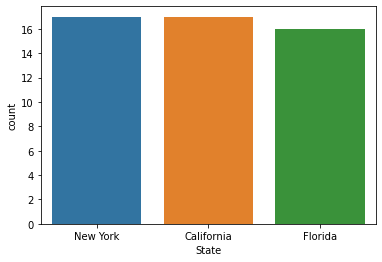

In [77]:
sns.countplot(df['State'])

# Distribution of continous col 

In [78]:
cont_cols = ['R&D Spend','Administration','Marketing Spend','Profit']

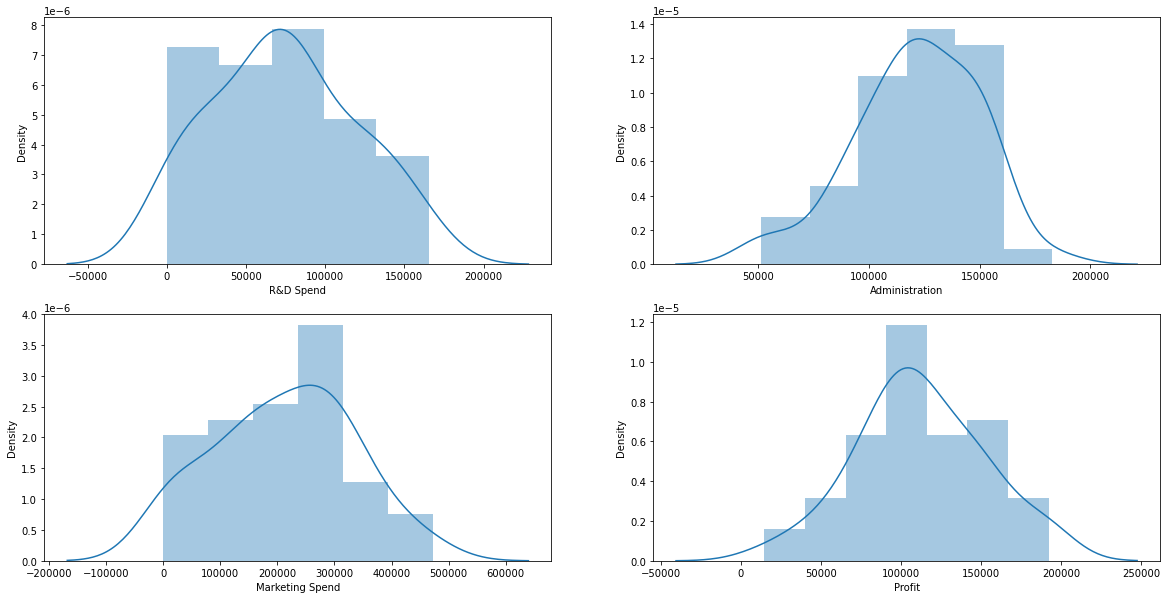

In [79]:
plt.figure(figsize = (20,10))
for idn, col in enumerate(cont_cols):
    plt.subplot(2,2,idn+1)
    sns.distplot(df[col])

In [80]:
# which state is more profitable 
df.groupby('State')['Profit'].sum()

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

<AxesSubplot:xlabel='State'>

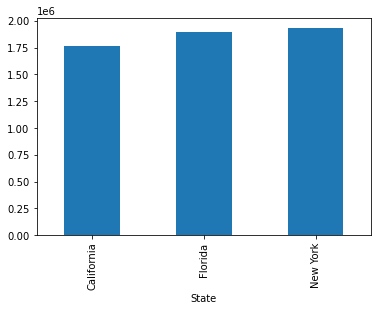

In [81]:
df.groupby('State')['Profit'].sum().plot(kind = 'bar')

# Boxplot

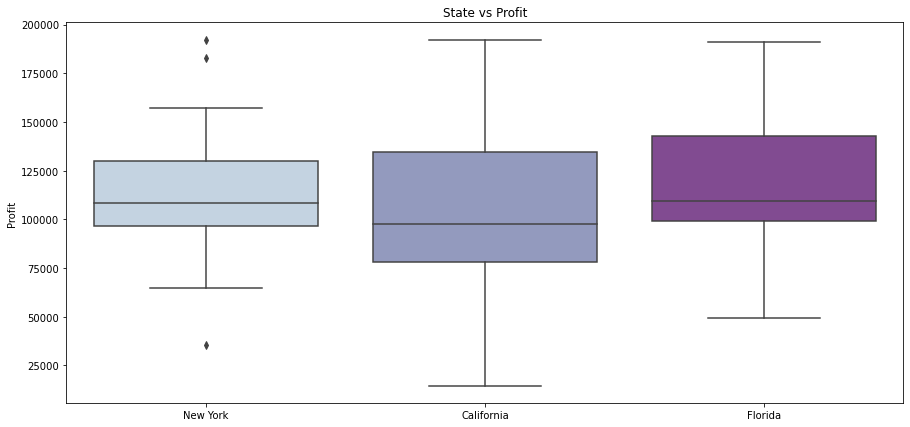

In [82]:
plt.figure(figsize = (15,7))
sns.boxplot(y='Profit', x='State', data = df, palette= 'BuPu')
plt.xlabel(None)
plt.ylabel('Profit')
plt.title('State vs Profit')
plt.show()

# Scatterplot

<AxesSubplot:xlabel='R&D Spend', ylabel='Marketing Spend'>

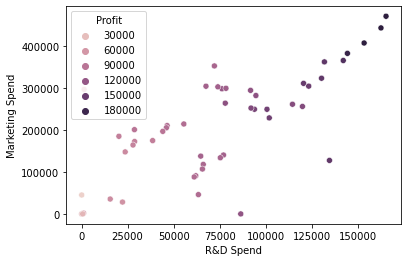

In [83]:
sns.scatterplot(x='R&D Spend',y='Marketing Spend',hue = 'Profit',data=df)

# pairplot

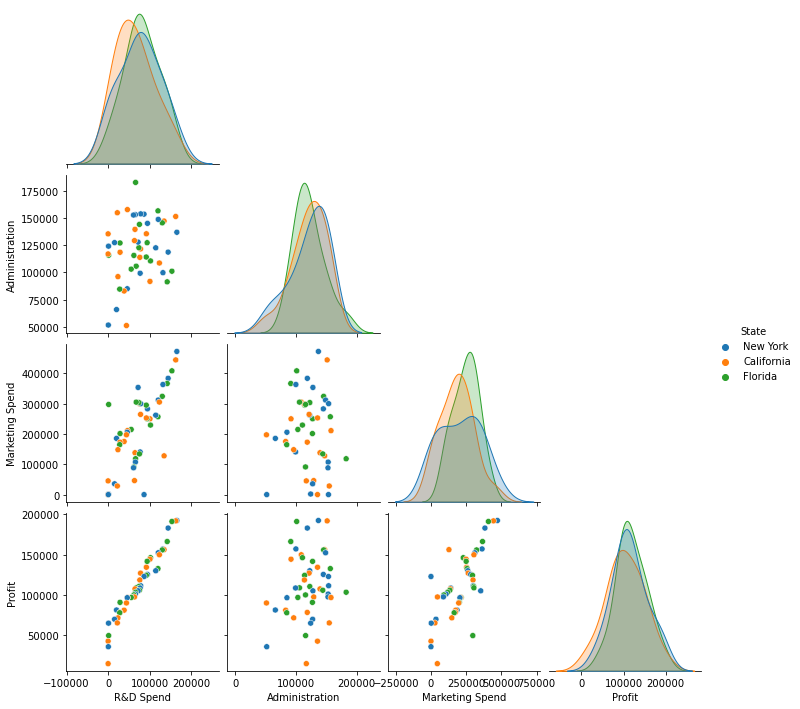

In [84]:
sns.pairplot(df,corner = True, hue = 'State')

# check null values


In [85]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# co-relation checking 

<AxesSubplot:>

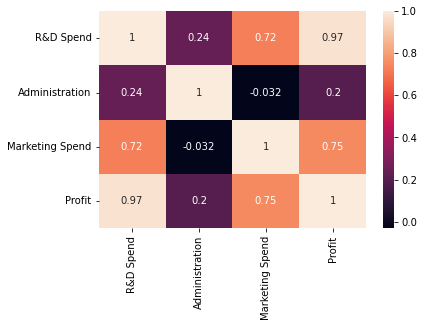

In [86]:
sns.heatmap(df.corr(),annot=True)

# Splitting into x and y

In [87]:
x = df.drop(['Profit','State','Marketing Spend'],axis = 1)
y = df['Profit']

* as the dataset is very small, there is no need for train test split. 

# model creation

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [95]:
print("Simple Linear Model's score/accuracy",lr.score(x,y)*100)

Simple Linear Model's score/accuracy 94.78129385009173


# Ploynomial regression

In [90]:
from sklearn.preprocessing import PolynomialFeatures 
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x)
p_reg = LinearRegression()
p_reg.fit(x_poly,y)
print('Polynomial Model Score', p_reg.score(x_poly,y)*100)

Polynomial Model Score 95.80490488086839
